In [316]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import web_scraping as ws
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%config InlineBackend.figure_format = 'png'
%matplotlib inline
sns.set(color_codes=True)
plt.style.use('seaborn-colorblind')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 2)

In [ ]:
is_genre_cols = ['is_Action', 'is_Adventure',
                 'is_Animation', 'is_Biography', 'is_Comedy', 'is_Crime', 'is_Drama',
                 'is_Family', 'is_Fantasy', 'is_History', 'is_Horror', 'is_Music',
                 'is_Musical', 'is_Mystery', 'is_News', 'is_Romance', 'is_Sci-Fi',
                 'is_Sport', 'is_Thriller', 'is_War', 'is_Western']

In [593]:
final_features_usa = ['budget', 'budget * is_summer_release',
                      'budget * is_xmas_release', 'oscar_wins',
                      'imdb_user_rating', 'imdb_user_rating_count',
                      'years_since_release']

final_features_japan = ['imdb_user_rating_count',
                        'non_oscar_wins', 'years_since_release',
                        'is_golden_week_release', 'is_summer_release',
                        'is_xmas_release']

features_1_japan = ['imdb_user_rating', 'imdb_user_rating_count',
                    'non_oscar_wins', 'years_since_release', 'years_since_release**2',
                    'is_golden_week_release', 'is_summer_release',
                    'is_xmas_release']

features_2_japan = ['imdb_user_rating_count',
                    'non_oscar_wins', 'years_since_release',
                    'is_golden_week_release', 'is_summer_release',
                    'is_xmas_release']

features_3_japan = ['imdb_user_rating_count',
                    'non_oscar_wins', 'years_since_release',
                    'is_summer_release', 'is_xmas_release']

features_4_japan = ['imdb_user_rating', 'imdb_user_rating_count',
                    'non_oscar_wins', 'years_since_release',
                    'is_summer_release', 'is_xmas_release']

features_5_japan = ['imdb_user_rating', 'imdb_user_rating_count',
                    'non_oscar_wins', 'years_since_release', 'is_golden_week_release',
                    'is_summer_release', 'is_xmas_release']

features_6_japan = ['budget', 'imdb_user_rating', 'imdb_user_rating_count',
                    'non_oscar_wins', 'years_since_release', 'is_golden_week_release',
                    'is_summer_release', 'is_xmas_release']

features_7_japan = ['imdb_user_rating_count',
                    'non_oscar_wins', 'years_since_release', 'is_golden_week_release',
                    'is_summer_release', 'is_xmas_release', 'non_oscar_wins * is_golden_week_release',
                    'non_oscar_wins * is_summer_release', 'non_oscar_wins * is_xmas_release',
                    'imdb_user_rating_count * is_golden_week_release', 'imdb_user_rating_count * is_summer_release',
                    'imdb_user_rating_count * is_xmas_release']

features_8_japan = ['imdb_user_rating_count',
                    'non_oscar_wins', 'years_since_release', 'is_golden_week_release',
                    'is_summer_release', 'is_xmas_release',
                    'non_oscar_wins * is_summer_release',
                    'imdb_user_rating_count * is_golden_week_release', 'imdb_user_rating_count * is_summer_release',
                    'imdb_user_rating_count * is_xmas_release']


features_9_japan = ['imdb_user_rating_count',
                    'non_oscar_wins', 'years_since_release', 'is_golden_week_release',
                    'is_summer_release', 'is_xmas_release',
                    'imdb_user_rating_count * is_golden_week_release',
                    'imdb_user_rating_count * is_summer_release',
                    'imdb_user_rating_count * is_xmas_release']

features_10_japan = ['imdb_user_rating', 'imdb_user_rating_count',
                     'non_oscar_wins', 'years_since_release', 'is_golden_week_release',
                     'is_summer_release', 'is_xmas_release', 'No Rating',
                     'PG', 'PG-13', 'R', 'TV-MA', 'TV-PG']

main_features = ['runtime_minutes', 'budget', 'years_since_release',
                 'imdb_user_rating', 'imdb_user_rating_count', 'oscar_wins',
                 'non_oscar_wins', 'metascore']

main_features_2 = ['runtime_minutes', 'budget',
                   'imdb_user_rating', 'imdb_user_rating_count',
                   'oscar_wins', 'non_oscar_wins', 'metascore', 'years_since_release',
                   'is_golden_week_release', 'is_summer_release',
                   'is_xmas_release']

main_features_3 = ['budget',
                   'imdb_user_rating', 'imdb_user_rating_count',
                   'oscar_wins', 'non_oscar_wins', 'years_since_release',
                   'is_golden_week_release', 'is_summer_release',
                   'is_xmas_release']


main_features_4 = ['budget',
                   'imdb_user_rating', 'imdb_user_rating_count',
                   'oscar_wins', 'non_oscar_wins', 'years_since_release',
                   'is_golden_week_release', 'is_summer_release',
                   'is_xmas_release', 'budget * is_golden_week_release',
                   'budget * is_summer_release', 'budget * is_xmas_release']

main_features_5_japan = ['budget',
                         'imdb_user_rating', 'imdb_user_rating_count',
                         'non_oscar_wins', 'years_since_release',
                         'is_golden_week_release', 'is_summer_release',
                         'is_xmas_release']

main_features_5_usa = ['budget',
                       'imdb_user_rating', 'imdb_user_rating_count',
                       'oscar_wins', 'years_since_release',
                       'is_golden_week_release', 'is_summer_release',
                       'is_xmas_release', 'budget * is_golden_week_release',
                       'budget * is_summer_release', 'budget * is_xmas_release']

main_features_6_usa = ['budget', 'imdb_user_rating', 'imdb_user_rating**2',
                       'imdb_user_rating_count', 'oscar_wins',
                       'years_since_release', 'years_since_release**2',
                       'is_summer_release', 'is_xmas_release',
                       'budget * is_summer_release', 'budget * is_xmas_release']

main_features_6_japan = ['budget', 'imdb_user_rating', 'imdb_user_rating**2',
                         'imdb_user_rating_count', 'non_oscar_wins',
                         'years_since_release', 'years_since_release**2',
                         'is_golden_week_release', 'is_summer_release',
                         'is_xmas_release']

main_features_7_usa = ['budget', 'imdb_user_rating',
                       'imdb_user_rating_count', 'oscar_wins',
                       'years_since_release',
                       'is_summer_release',
                       'is_xmas_release']

main_features_8_usa = ['budget', 'imdb_user_rating',
                       'imdb_user_rating_count', 'oscar_wins', 'oscar_wins**2',
                       'years_since_release', 'is_summer_release', 'is_xmas_release', ]


main_features_9_usa = ['budget', 'imdb_user_rating',
                       'imdb_user_rating_count', 'oscar_wins', 'budget**2',
                       'years_since_release', 'is_summer_release', 'is_xmas_release', ]

main_features_10_usa = ['budget', 'imdb_user_rating',
                        'imdb_user_rating_count', 'oscar_wins', 'budget * is_summer_release',
                        'years_since_release', 'is_summer_release', 'is_xmas_release']

features_11_usa = ['budget', 'imdb_user_rating',
                   'imdb_user_rating_count', 'oscar_wins', 'budget * is_summer_release',
                   'budget * is_xmas_release', 'years_since_release', ]

features_12_usa = ['budget', 'imdb_user_rating',
                   'imdb_user_rating_count', 'imdb_user_rating_count**2',
                   'oscar_wins', 'budget * is_summer_release',
                   'budget * is_xmas_release', 'years_since_release']

features_13_usa = ['budget', 'imdb_user_rating', 'imdb_user_rating**2',
                   'imdb_user_rating_count', 'imdb_user_rating_count**2',
                   'oscar_wins', 'budget * is_summer_release',
                   'budget * is_xmas_release', 'years_since_release']

features_14_usa = ['budget', 'imdb_user_rating',
                   'imdb_user_rating_count', 'oscar_wins', 'budget * oscar_wins',
                   'budget * is_summer_release',
                   'budget * is_xmas_release', 'years_since_release', ]

features_15_usa = ['budget', 'imdb_user_rating',
                   'imdb_user_rating_count', 'oscar_wins', 'budget * imdb_user_rating',
                   'budget * is_summer_release',
                   'budget * is_xmas_release', 'years_since_release', ]


all_usa_features = ['runtime_minutes', 'budget',
                    'imdb_user_rating', 'imdb_user_rating_count',
                    'oscar_wins', 'non_oscar_wins', 'metascore', 'years_since_release',
                    'is_golden_week_release', 'is_summer_release',
                    'is_xmas_release', 'is_Action', 'is_Adventure', 'is_Animation',
                    'is_Biography', 'is_Comedy', 'is_Crime', 'is_Drama', 'is_Family',
                    'is_Fantasy', 'is_History', 'is_Horror', 'is_Music', 'is_Musical',
                    'is_Mystery', 'is_News', 'is_Romance', 'is_Sci-Fi', 'is_Sport',
                    'is_Thriller', 'is_War', 'is_Western', 'No Rating', 'Other', 'PG',
                    'PG-13', 'R']

all_japan_features = ['runtime_minutes', 'budget',
                      'imdb_user_rating', 'imdb_user_rating_count',
                      'oscar_wins', 'non_oscar_wins', 'metascore', 'years_since_release',
                      'is_golden_week_release', 'is_summer_release',
                      'is_xmas_release', 'is_Action', 'is_Adventure', 'is_Animation',
                      'is_Biography', 'is_Comedy', 'is_Crime', 'is_Drama', 'is_Family',
                      'is_Fantasy', 'is_History', 'is_Horror', 'is_Music', 'is_Musical',
                      'is_Mystery', 'is_News', 'is_Romance', 'is_Sci-Fi', 'is_Sport',
                      'is_Thriller', 'is_War', 'is_Western', 'No Rating', 'PG', 'PG-13', 'R',
                      'TV-MA', 'TV-PG']

target = ['global_gross']

main_features_target = main_features + target

In [565]:
usa_df['imdb_user_rating**2'] = usa_df['imdb_user_rating']**2
usa_df['imdb_user_rating_count**2'] = usa_df['imdb_user_rating_count']**2
usa_df['years_since_release**2'] = usa_df['years_since_release']**2
usa_df['budget**2'] = usa_df['budget']**2
usa_df['oscar_wins**2'] = usa_df['oscar_wins']**2
usa_df['budget * oscar_wins'] = usa_df['budget'] * usa_df['oscar_wins']
usa_df['budget * imdb_user_rating'] = usa_df['budget'] * usa_df['imdb_user_rating']

japan_df['imdb_user_rating**2'] = japan_df['imdb_user_rating']**2
japan_df['years_since_release**2'] = japan_df['years_since_release']**2
japan_df['non_oscar_wins * is_golden_week_release'] = japan_df['non_oscar_wins'] * japan_df['is_golden_week_release']
japan_df['non_oscar_wins * is_summer_release'] = japan_df['non_oscar_wins'] * japan_df['is_summer_release']
japan_df['non_oscar_wins * is_xmas_release'] = japan_df['non_oscar_wins'] * japan_df['is_xmas_release']
japan_df['imdb_user_rating_count * is_golden_week_release'] = japan_df['imdb_user_rating_count'] * japan_df['is_golden_week_release']
japan_df['imdb_user_rating_count * is_summer_release'] = japan_df['imdb_user_rating_count'] * japan_df['is_summer_release']
japan_df['imdb_user_rating_count * is_xmas_release'] = japan_df['imdb_user_rating_count'] * japan_df['is_xmas_release']

In [581]:
japan_df.columns

Index(['title', 'country', 'runtime_minutes', 'budget', 'global_gross',
       'mpaa_rating', 'genres', 'imdb_user_rating', 'imdb_user_rating_count',
       'oscar_wins', 'non_oscar_wins', 'metascore', 'release_date',
       'years_since_release', 'is_golden_week_release', 'is_summer_release',
       'is_xmas_release', 'is_Action', 'is_Adventure', 'is_Animation',
       'is_Biography', 'is_Comedy', 'is_Crime', 'is_Drama', 'is_Family',
       'is_Fantasy', 'is_History', 'is_Horror', 'is_Music', 'is_Musical',
       'is_Mystery', 'is_News', 'is_Romance', 'is_Sci-Fi', 'is_Sport',
       'is_Thriller', 'is_War', 'is_Western', 'No Rating', 'PG', 'PG-13', 'R',
       'TV-MA', 'TV-PG', 'budget * is_golden_week_release',
       'budget * is_summer_release', 'budget * is_xmas_release',
       'imdb_user_rating**2', 'years_since_release**2',
       'non_oscar_wins * is_golden_week_release',
       'non_oscar_wins * is_summer_release',
       'non_oscar_wins * is_xmas_release',
       'imdb_user_

In [580]:
cv_records

[{'model': 'USA',
  'label': 'features_11_usa',
  'mean_train_score': 0.697,
  'mean_val_score': 0.686},
 {'model': 'USA',
  'label': 'features_12_usa',
  'mean_train_score': 0.737,
  'mean_val_score': 0.725},
 {'model': 'USA',
  'label': 'features_13_usa',
  'mean_train_score': 0.744,
  'mean_val_score': 0.731},
 {'model': 'USA',
  'label': 'features_14_usa',
  'mean_train_score': 0.7,
  'mean_val_score': 0.685},
 {'model': 'USA',
  'label': 'features_15_usa',
  'mean_train_score': 0.698,
  'mean_val_score': 0.682},
 {'model': 'USA',
  'label': 'final_features_usa',
  'mean_train_score': 0.697,
  'mean_val_score': 0.686},
 {'model': 'Japan',
  'label': 'features_1_japan',
  'mean_train_score': 0.496,
  'mean_val_score': 0.29},
 {'model': 'Japan',
  'label': 'features_2_japan',
  'mean_train_score': 0.494,
  'mean_val_score': 0.285},
 {'model': 'Japan',
  'label': 'features_3_japan',
  'mean_train_score': 0.492,
  'mean_val_score': 0.282},
 {'model': 'Japan',
  'label': 'features_4_jap

In [566]:
japan_df.head()

,title,country,runtime_minutes,budget,global_gross,mpaa_rating,genres,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,release_date,years_since_release,is_golden_week_release,is_summer_release,is_xmas_release,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,No Rating,PG,PG-13,R,TV-MA,TV-PG,budget * is_golden_week_release,budget * is_summer_release,budget * is_xmas_release,imdb_user_rating**2,years_since_release**2,non_oscar_wins * is_golden_week_release,non_oscar_wins * is_summer_release,non_oscar_wins * is_xmas_release,imdb_user_rating_count * is_golden_week_release,imdb_user_rating_count * is_summer_release,imdb_user_rating_count * is_xmas_release
0,Psycho Pass 3: First Inspector,Japan,135.0,1.03e+07,7.57e+05,No Rating,"[Animation, Sci-Fi]",7.6,187.0,0.0,0.0,71.0,2020-03-27,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,57.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Gekijôban Shirobako,Japan,119.0,1.03e+07,2.59e+06,No Rating,"[Animation, Comedy, Drama]",6.4,16.0,0.0,0.0,71.0,2020-02-29,0.0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,40.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Digimon Adventure: Last Evolution Kizuna,Japan,65.0,1.03e+07,3.97e+06,No Rating,"[Animation, Action, Adventure, Sci-Fi, Thriller]",7.3,209.0,0.0,0.0,71.0,2020-02-21,0.0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0.0,0.0,0.0,53.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,High School Fleet the Movie,Japan,105.0,1.03e+07,6.09e+05,No Rating,"[Animation, Action, Adventure, Comedy, Drama]",6.1,12.0,0.0,0.0,71.0,2020-01-18,0.0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,37.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Made in Abyss: Dawn of the Deep Soul,Japan,113.0,1.03e+07,4.91e+06,No Rating,"[Animation, Adventure, Fantasy, Mystery, Sci-F...",8.1,163.0,0.0,0.0,71.0,2020-01-17,0.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0.0,0.0,0.0,65.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [351]:
usa_df['budget * is_golden_week_release'] = usa_df['budget'] * usa_df['is_golden_week_release']
usa_df['budget * is_summer_release'] = usa_df['budget'] * usa_df['is_summer_release']
usa_df['budget * is_xmas_release'] = usa_df['budget'] * usa_df['is_xmas_release']

japan_df['budget * is_golden_week_release'] = japan_df['budget'] * japan_df['is_golden_week_release']
japan_df['budget * is_summer_release'] = japan_df['budget'] * japan_df['is_summer_release']
japan_df['budget * is_xmas_release'] = japan_df['budget'] * japan_df['is_xmas_release']

In [529]:
japan_df[features_1_japan+target].corr()

,imdb_user_rating,imdb_user_rating_count,non_oscar_wins,years_since_release,years_since_release**2,is_golden_week_release,is_summer_release,is_xmas_release,global_gross
imdb_user_rating,1.00,0.29,0.27,0.14,1.43e-01,-0.10,0.05,0.02,1.54e-01
imdb_user_rating_count,0.29,1.00,0.77,0.22,2.06e-01,-0.03,0.15,-0.06,6.16e-01
non_oscar_wins,0.27,0.77,1.00,0.07,3.16e-02,-0.01,0.16,-0.07,6.24e-01
years_since_release,0.14,0.22,0.07,1.00,9.47e-01,-0.09,0.05,0.06,3.56e-02
years_since_release**2,0.14,0.21,0.03,0.95,1.00e+00,-0.08,0.03,0.02,8.96e-03
is_golden_week_release,-0.10,-0.03,-0.01,-0.09,-7.52e-02,1.00,-0.10,-0.05,-5.86e-02
is_summer_release,0.05,0.15,0.16,0.05,2.67e-02,-0.10,1.00,-0.20,1.88e-01
is_xmas_release,0.02,-0.06,-0.07,0.06,2.40e-02,-0.05,-0.20,1.00,-4.21e-02
global_gross,0.15,0.62,0.62,0.04,8.96e-03,-0.06,0.19,-0.04,1.00e+00


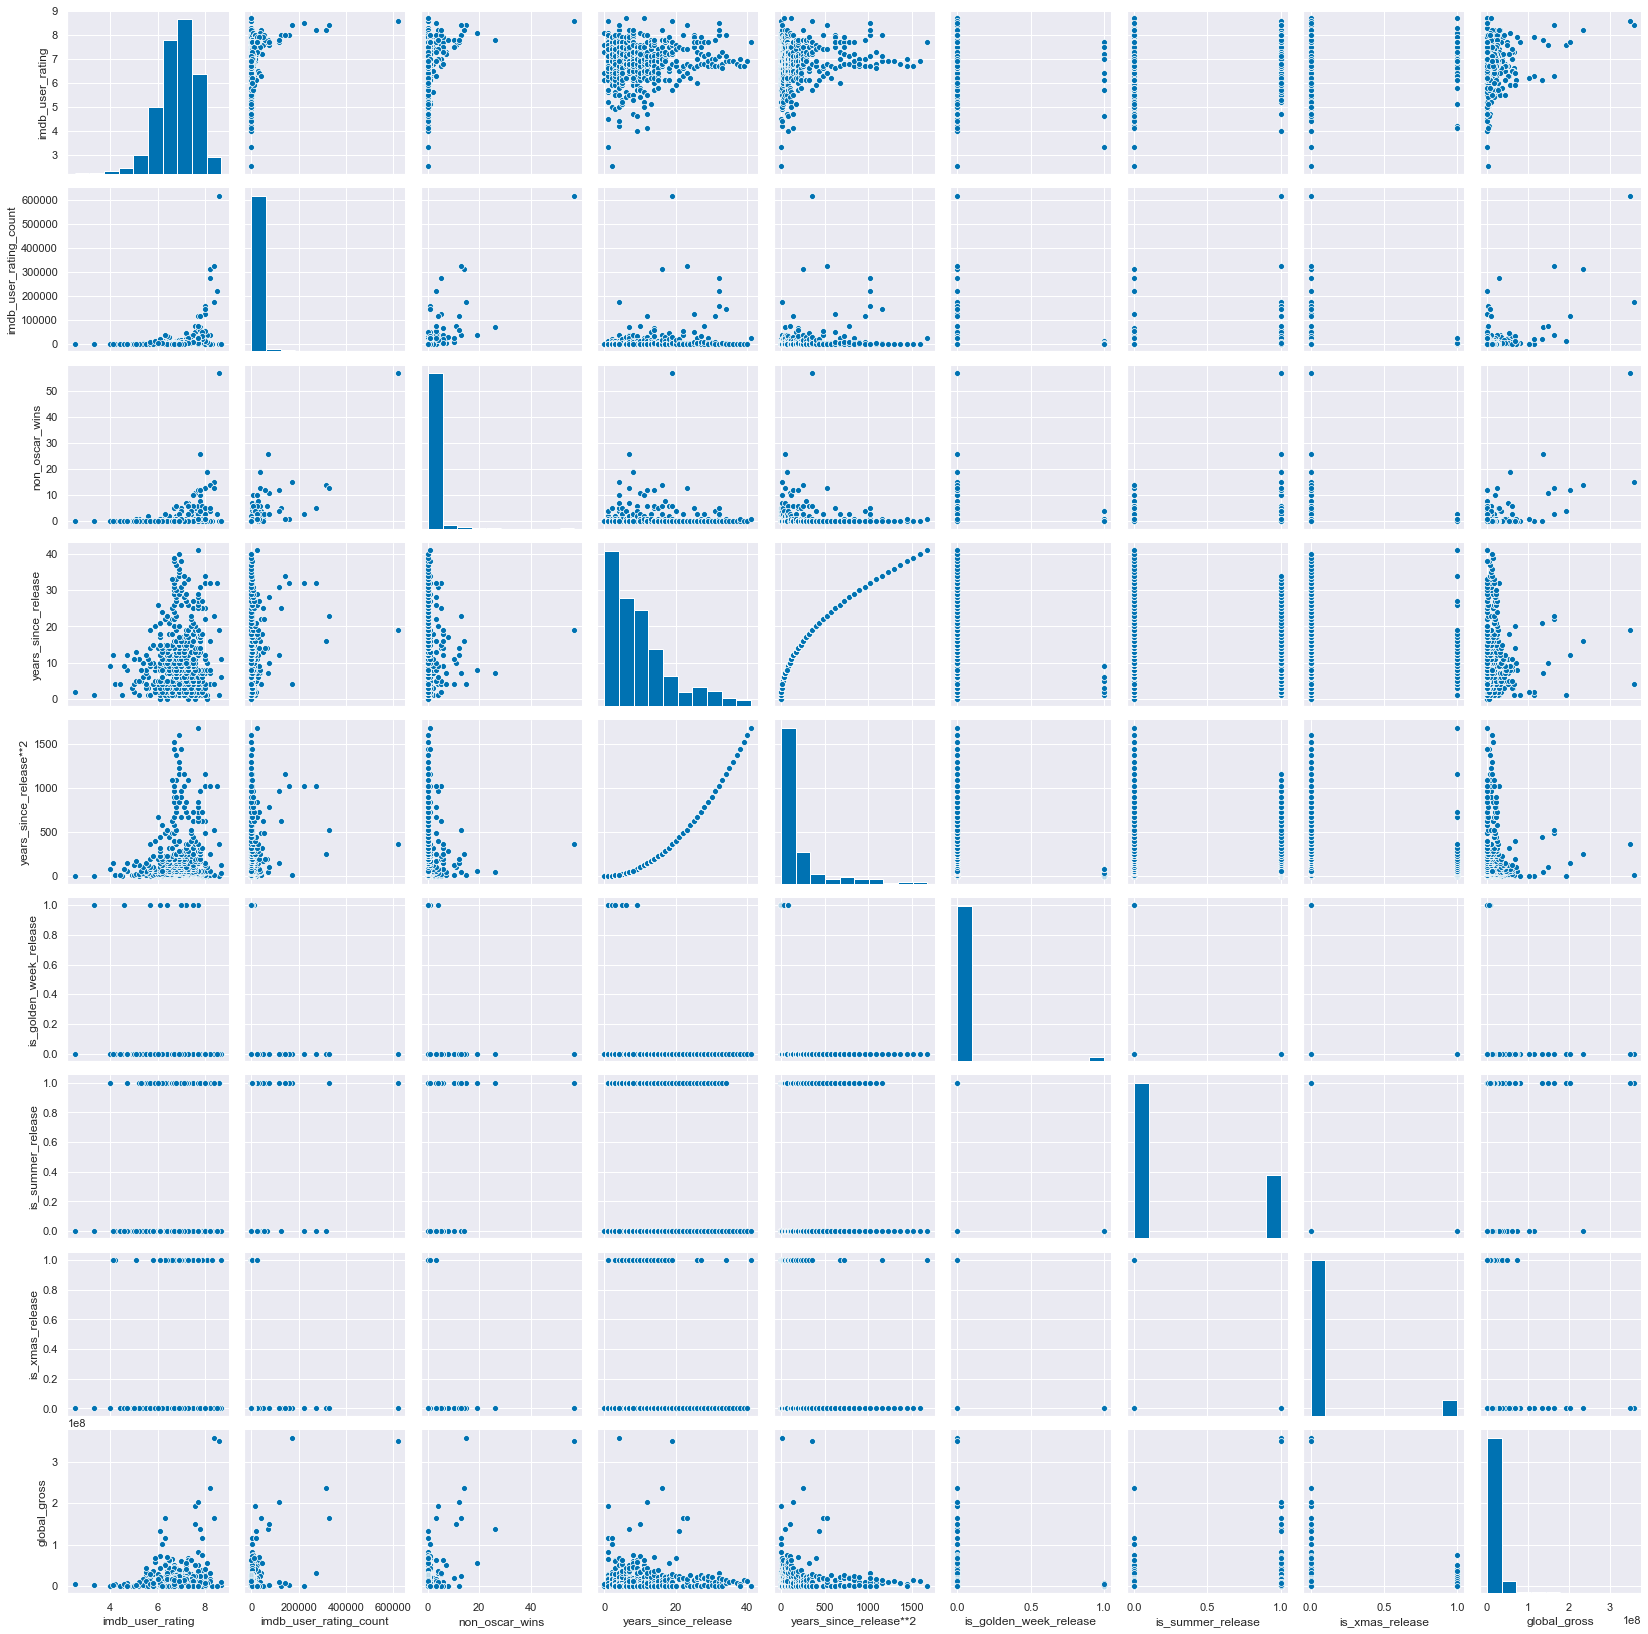

In [528]:
sns.pairplot(japan_df[features_1_japan+target])

In [503]:
cv_records

[{'model': 'USA',
  'label': 'features_11_usa',
  'mean_train_score': 0.697,
  'mean_val_score': 0.686},
 {'model': 'USA',
  'label': 'features_12_usa',
  'mean_train_score': 0.737,
  'mean_val_score': 0.725},
 {'model': 'USA',
  'label': 'features_13_usa',
  'mean_train_score': 0.744,
  'mean_val_score': 0.731}]

In [ ]:
# Put in feature_engineering module

def create_genre_encodings(df, unique_genres):
    for genre in unique_genres:
        df['is_' + genre] = df.apply(lambda x: genre in x['genres'], axis=1).astype(int)

In [607]:
with open('final_usa_df.pickle', 'wb') as to_write:
    pickle.dump(usa_df, to_write)

In [606]:
with open('final_japan_df.pickle', 'wb') as to_write:
    pickle.dump(japan_df, to_write)

In [4]:
with open('cleaned_usa_df.pickle', 'rb') as read_file:
    usa_df = pickle.load(read_file)

In [6]:
with open('cleaned_japan_df.pickle', 'rb') as read_file:
    japan_df = pickle.load(read_file)

In [608]:
with open('cv_records.pickle', 'wb') as to_write:
    pickle.dump(cv_records, to_write)

In [136]:
usa_df['mpaa_rating'].value_counts()

PG           228
G            138
No Rating     74
PG-13         17
R             13
Other          4
Name: mpaa_rating, dtype: int64

In [151]:
usa_df = usa_df.join(usa_df_mpaa_rating_dummies)

In [155]:
japan_df = japan_df.join(japan_df_mpaa_rating_dummies)

In [156]:
japan_df.head()

,title,country,runtime_minutes,budget,global_gross,mpaa_rating,genres,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,release_date,years_since_release,is_golden_week_release,is_summer_release,is_xmas_release,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,No Rating,PG,PG-13,R,TV-MA,TV-PG
0,Psycho Pass 3: First Inspector,Japan,135.0,1.03e+07,7.57e+05,No Rating,"[Animation, Sci-Fi]",7.6,187.0,0.0,0.0,71.0,2020-03-27,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,Gekijôban Shirobako,Japan,119.0,1.03e+07,2.59e+06,No Rating,"[Animation, Comedy, Drama]",6.4,16.0,0.0,0.0,71.0,2020-02-29,0.0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Digimon Adventure: Last Evolution Kizuna,Japan,65.0,1.03e+07,3.97e+06,No Rating,"[Animation, Action, Adventure, Sci-Fi, Thriller]",7.3,209.0,0.0,0.0,71.0,2020-02-21,0.0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
3,High School Fleet the Movie,Japan,105.0,1.03e+07,6.09e+05,No Rating,"[Animation, Action, Adventure, Comedy, Drama]",6.1,12.0,0.0,0.0,71.0,2020-01-18,0.0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Made in Abyss: Dawn of the Deep Soul,Japan,113.0,1.03e+07,4.91e+06,No Rating,"[Animation, Adventure, Fantasy, Mystery, Sci-F...",8.1,163.0,0.0,0.0,71.0,2020-01-17,0.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0


In [140]:
usa_df.reset_index(inplace=True, drop=True)
japan_df.reset_index(inplace=True, drop=True)

In [133]:
usa_df.loc[(usa_df['mpaa_rating'] == 'TV-PG') | (usa_df['mpaa_rating'] == 'TV-MA'), 'mpaa_rating']

In [150]:
japan_df_mpaa_rating_dummies = pd.get_dummies(japan_df['mpaa_rating'], drop_first=True)

In [148]:
usa_df_mpaa_rating_dummies = pd.get_dummies(usa_df['mpaa_rating'], drop_first=True)

In [468]:
def feature_target_selection(features, target, df):
    X = df.loc[:, features]
    y = df[target]
    return X, y

In [516]:
usa_X, usa_y = feature_target_selection(final_features_usa, target, usa_df)

usa_X_train_val, usa_X_test, usa_y_train_val, usa_y_test = initial_split(usa_X, usa_y)

In [594]:
japan_X, japan_y = feature_target_selection(final_features_japan, target, japan_df)

japan_X_train_val, japan_X_test, japan_y_train_val, japan_y_test = initial_split(japan_X, japan_y)

In [409]:
p_usa_8 = PolynomialFeatures(degree=2)
usa_X_train_val_8_poly = p_usa_8.fit_transform(usa_X_train_val_8)

cv(usa_X_train_val_8_poly, usa_y_train_val_8)

s_usa_8 = StandardScaler(with_mean=False)
usa_X_train_val_8_poly_standard = s_usa_8.fit_transform(usa_X_train_val_8_poly)

cv(usa_X_train_val_8_poly_standard, usa_y_train_val_8)

[0.81591062 0.83525141 0.81697352 0.85127546 0.80777642]
Mean train R^2:      0.825 

[0.80933276 0.626077   0.79722596 0.69470419 0.72567274]
Mean val R^2:        0.731
[0.82800972 0.8471773  0.83169354 0.86327265 0.82152927]
Mean train R^2:      0.838 

[0.80501973 0.62219079 0.79190975 0.71175811 0.76743276]
Mean val R^2:        0.74


In [551]:
p_japan = PolynomialFeatures(degree=2)
japan_X_train_val_poly = p_japan.fit_transform(japan_X_train_val)

cv(japan_X_train_val_poly, japan_y_train_val)

s_japan = StandardScaler(with_mean=False)
japan_X_train_val_poly_standard = s_japan.fit_transform(japan_X_train_val_poly)

cv(japan_X_train_val_poly_standard, japan_y_train_val)

[ 0.75205724  0.75369931  0.75988592 -0.33199399  0.73823883]
Mean train R^2:      0.534 

[-11.1627523    0.14867859   0.05295783  -0.95638259   0.64066278]
Mean val R^2:        -2.255
Model: Japan
Iteration description: features_5_japan_poly
[0.75205724 0.75369931 0.75988592 0.69509481 0.73823883]
Mean train R^2:      0.74 

[-11.16275048   0.14867718   0.05295739  -1.14139509   0.64066281]
Mean val R^2:        -2.292
Model: Japan
Iteration description: features_5_japan_poly_standard


In [601]:
japan_X_test_poly = p_japan.transform(japan_X_test)

ValueError: X shape does not match training shape

In [428]:
# alpha_vec = 10**np.linspace(0, 2, 100)

lasso_model_usa_8 = LassoCV(cv=5, max_iter=10000)

lasso_model_usa_8.fit(usa_X_train_val_8_poly_standard, usa_y_train_val_8.values.ravel())

LassoCV(cv=5, max_iter=10000)

In [552]:
lasso_model_japan = LassoCV(cv=5, max_iter=10000)

lasso_model_japan.fit(japan_X_train_val_poly_standard, japan_y_train_val.values.ravel())

LassoCV(cv=5, max_iter=10000)

In [555]:
lasso_model_japan.alpha_

149492.90440921768

In [556]:
lasso_model_japan.coef_

array([ 0.00000000e+00,  0.00000000e+00,  7.57619277e+07,  5.69449614e+06,
        1.16689451e+06, -6.52717620e+05,  8.26980804e+05,  0.00000000e+00,
       -1.60796364e+06,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  6.57623161e+05,  4.93918371e+06,
        0.00000000e+00, -4.98094220e+07, -7.08530961e+05,  4.09792758e+06,
        9.55108602e+05, -3.97939240e+06, -2.63505108e+07,  5.20534219e+05,
        1.22492896e+07, -0.00000000e+00,  2.82286394e+05, -5.06179004e+04,
       -1.87323238e+06, -1.11912701e+06, -1.35219531e+05,  0.00000000e+00,
        0.00000000e+00,  5.70209734e+05,  0.00000000e+00,  0.00000000e+00])

In [445]:
type(p_usa_8.get_feature_names())

list

In [557]:
list(zip(p_japan.get_feature_names(features_5_japan), lasso_model_japan.coef_))

[('1', 0.0),
 ('imdb_user_rating', 0.0),
 ('imdb_user_rating_count', 75761927.66223268),
 ('non_oscar_wins', 5694496.141317765),
 ('years_since_release', 1166894.5119655845),
 ('is_golden_week_release', -652717.619693088),
 ('is_summer_release', 826980.8036317371),
 ('is_xmas_release', 0.0),
 ('imdb_user_rating^2', -1607963.63708738),
 ('imdb_user_rating imdb_user_rating_count', 0.0),
 ('imdb_user_rating non_oscar_wins', 0.0),
 ('imdb_user_rating years_since_release', -0.0),
 ('imdb_user_rating is_golden_week_release', -0.0),
 ('imdb_user_rating is_summer_release', 0.0),
 ('imdb_user_rating is_xmas_release', 657623.1607895246),
 ('imdb_user_rating_count^2', 4939183.707187015),
 ('imdb_user_rating_count non_oscar_wins', 0.0),
 ('imdb_user_rating_count years_since_release', -49809421.95455598),
 ('imdb_user_rating_count is_golden_week_release', -708530.9606013389),
 ('imdb_user_rating_count is_summer_release', 4097927.5834237565),
 ('imdb_user_rating_count is_xmas_release', 955108.601658

In [558]:
lasso_predict_japan_train_val = lasso_model_japan.predict(japan_X_train_val_poly_standard)

In [559]:
r2_score(japan_y_train_val, lasso_predict_japan_train_val)

0.7260707425582236

In [597]:
japan_X_test_standard = s_japan.fit_transform(japan_X_test)

In [599]:
japan_y_test.shape

(100, 1)

In [600]:
japan_X_test_standard.shape

(100, 6)

In [598]:
r2_score(japan_y_test, lasso_model_japan.predict(japan_X_test_standard))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 36 is different from 6)

In [430]:
lasso_model_usa_8.alpha_

4045303.9073412875

In [520]:
cv(usa_X_train_val, usa_y_train_val)

[0.70265757 0.68402035 0.68958487 0.72814402 0.68207569]
Mean train R^2:      0.697 

[0.65454051 0.76449434 0.70369794 0.59503011 0.71466035]
Mean val R^2:        0.686
Model: USA
Iteration description: final_features_usa


In [596]:
cv(japan_X_train_val, japan_y_train_val)

[0.41481462 0.46069966 0.50851569 0.50893103 0.576595  ]
Mean train R^2:      0.494 

[ 0.61623609  0.55022999 -0.30907538  0.29107051  0.2766872 ]
Mean val R^2:        0.285
Model: Japan
Iteration description: final_features_japan


In [519]:
split_and_simple_validate(usa_X_train_val, usa_y_train_val)

Training R^2 score:            0.704
Validation R^2 score:          0.654
Intercept:                     -111954458.2929228

Feature coefficients: 

budget                         2.30
budget * is_summer_release     0.83
budget * is_xmas_release       0.31
oscar_wins                     49451473.54
imdb_user_rating               11299242.52
imdb_user_rating_count         655.18
years_since_release            -631750.04


In [590]:
japan_df[features_1_japan + target].corr()

,imdb_user_rating,imdb_user_rating_count,non_oscar_wins,years_since_release,years_since_release**2,is_golden_week_release,is_summer_release,is_xmas_release,global_gross
imdb_user_rating,1.00,0.29,0.27,0.14,1.43e-01,-0.10,0.05,0.02,1.54e-01
imdb_user_rating_count,0.29,1.00,0.77,0.22,2.06e-01,-0.03,0.15,-0.06,6.16e-01
non_oscar_wins,0.27,0.77,1.00,0.07,3.16e-02,-0.01,0.16,-0.07,6.24e-01
years_since_release,0.14,0.22,0.07,1.00,9.47e-01,-0.09,0.05,0.06,3.56e-02
years_since_release**2,0.14,0.21,0.03,0.95,1.00e+00,-0.08,0.03,0.02,8.96e-03
is_golden_week_release,-0.10,-0.03,-0.01,-0.09,-7.52e-02,1.00,-0.10,-0.05,-5.86e-02
is_summer_release,0.05,0.15,0.16,0.05,2.67e-02,-0.10,1.00,-0.20,1.88e-01
is_xmas_release,0.02,-0.06,-0.07,0.06,2.40e-02,-0.05,-0.20,1.00,-4.21e-02
global_gross,0.15,0.62,0.62,0.04,8.96e-03,-0.06,0.19,-0.04,1.00e+00


In [595]:
split_and_simple_validate(japan_X_train_val, japan_y_train_val)

Training R^2 score:            0.407
Validation R^2 score:          0.57
Intercept:                     10383636.33475189

Feature coefficients: 

imdb_user_rating_count         311.88
non_oscar_wins                 4892813.53
years_since_release            -399292.15
is_golden_week_release         -13242069.41
is_summer_release              3960905.12
is_xmas_release                4739095.65


In [26]:
def initial_split(X, y):
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=0.2, random_state=4444)
    return X_train_val, X_test, y_train_val, y_test

In [518]:
def split_and_simple_validate(X_train_val, y_train_val):
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=.25, random_state=4444)
    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    train_score = lr_model.score(X_train, y_train)
    val_score = lr_model.score(X_val, y_val)
    
    print(f'{"Training R^2 score:": <30}', round(train_score, 3))
    print(f'{"Validation R^2 score:": <30}', round(val_score, 3))
    print(f'{"Intercept:": <30} {lr_model.intercept_[0]}')
    print('\nFeature coefficients: \n')
    
    for feature, coef in zip(X_train_val.columns, lr_model.coef_[0]): # For some reason, coef are in list of lists
        print(f'{feature: <30} {coef:.2f}') 
        
#     return X_train, X_val, y_train, y_val, lr_model

In [481]:
def cv(X_train_val, y_train_val):
    lr_model = LinearRegression()
    kf = KFold(n_splits=5, shuffle=True, random_state=4444)
    
    scores = cross_validate(lr_model, X_train_val, y_train_val, cv=kf, scoring='r2', return_train_score=True)
    mean_train_score = round(np.mean(scores['train_score']), 3)
    mean_val_score = round(np.mean(scores['test_score']), 3)
    
    print(scores['train_score'])    
    print(f'{"Mean train R^2:": <20}', mean_train_score,'\n')
    
    print(scores['test_score'])
    print(f'{"Mean val R^2:": <20}', mean_val_score)
    
    cv_records.append(record_cv(mean_train_score, mean_val_score))

In [602]:
cv_records

[{'model': 'USA',
  'label': 'features_11_usa',
  'mean_train_score': 0.697,
  'mean_val_score': 0.686},
 {'model': 'USA',
  'label': 'features_12_usa',
  'mean_train_score': 0.737,
  'mean_val_score': 0.725},
 {'model': 'USA',
  'label': 'features_13_usa',
  'mean_train_score': 0.744,
  'mean_val_score': 0.731},
 {'model': 'USA',
  'label': 'features_14_usa',
  'mean_train_score': 0.7,
  'mean_val_score': 0.685},
 {'model': 'USA',
  'label': 'features_15_usa',
  'mean_train_score': 0.698,
  'mean_val_score': 0.682},
 {'model': 'USA',
  'label': 'final_features_usa',
  'mean_train_score': 0.697,
  'mean_val_score': 0.686},
 {'model': 'Japan',
  'label': 'features_1_japan',
  'mean_train_score': 0.496,
  'mean_val_score': 0.29},
 {'model': 'Japan',
  'label': 'features_2_japan',
  'mean_train_score': 0.494,
  'mean_val_score': 0.285},
 {'model': 'Japan',
  'label': 'features_3_japan',
  'mean_train_score': 0.492,
  'mean_val_score': 0.282},
 {'model': 'Japan',
  'label': 'features_4_jap

In [485]:
cv_records = []

In [487]:
cv_records

[{'model': 'USA',
  'label': 'features_11_usa',
  'mean_train_score': 0.697,
  'mean_val_score': 0.686}]

In [484]:
def record_cv(mean_train_score, mean_val_score):
    cv_dict = {}
    model = input("Model: ")
    label = input("Iteration description: ")
    cv_dict['model'] = model
    cv_dict['label'] = label
    cv_dict['mean_train_score'] = mean_train_score
    cv_dict['mean_val_score'] = mean_val_score
    return cv_dict     

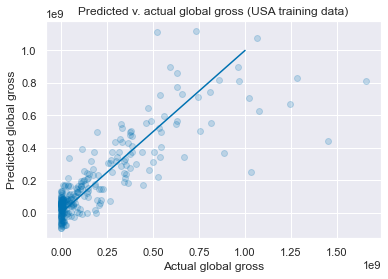

In [110]:
# USA predicted versus actual (training data)
usa_y_train_pred = usa_model.predict(usa_X_train)

plt.scatter(usa_y_train, usa_y_train_pred, alpha=0.2)
plt.xlabel('Actual global gross')
plt.ylabel('Predicted global gross')
plt.title('Predicted v. actual global gross (USA training data)')
plt.plot([0, 1e9], [0, 1e9]);

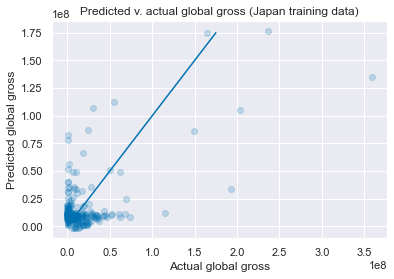

In [114]:
# Japan predicted versus actual (training data)
japan_y_train_pred = japan_model.predict(japan_X_train)

plt.scatter(japan_y_train, japan_y_train_pred, alpha=0.2)
plt.xlabel('Actual global gross')
plt.ylabel('Predicted global gross')
plt.title('Predicted v. actual global gross (Japan training data)')
plt.plot([0, 1.75e8], [0, 1.75e8]);